<a href="https://colab.research.google.com/github/andreaperaltabarria/tareas/blob/main/Andrea_Peralta_UDD_Proyecto_M7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

## Proyecto número 7

Bien, decidimos utilizar el dataset sobre Reviews de aplicaciones de la Google Play Store debido a que de todos es el que personalmente encuentro más interesando y aplicable a i trabajo.

In [1]:
#partimos importando las librerías a utilizar
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
import os
import kagglehub
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from scipy.stats import loguniform
from sklearn.metrics import classification_report
from scipy import stats

In [2]:
#además de cargar nuestro dataset
!pip install kaggle


In [3]:
dataset=kagglehub.dataset_download("lava18/google-play-store-apps")

100%|██████████| 1.94M/1.94M [00:00<00:00, 6.28MB/s]

Extracting files...


In [4]:
csv_file_path = os.path.join(dataset, "googleplaystore_user_reviews.csv")
df = pd.read_csv(csv_file_path)

In [5]:
#tenemos nuestro dataset exitosamente
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#Análisis Exploratorio de nuestro dataset

In [6]:
#vemos su tamaño
df.shape

(64295, 5)

In [7]:
#revisamos el nivel de comentarios positivos y negativos
df['Sentiment'].value_counts('%')

,proportion
Sentiment,
Positive,0.641109
Negative,0.220961
Neutral,0.137930


Vemos que el nivel de sentimienot indica que el 64% tiene comentarios de características positivas, el 22% negativas y el 14% tiene comentarios más bien neutrales de las aplicaciones

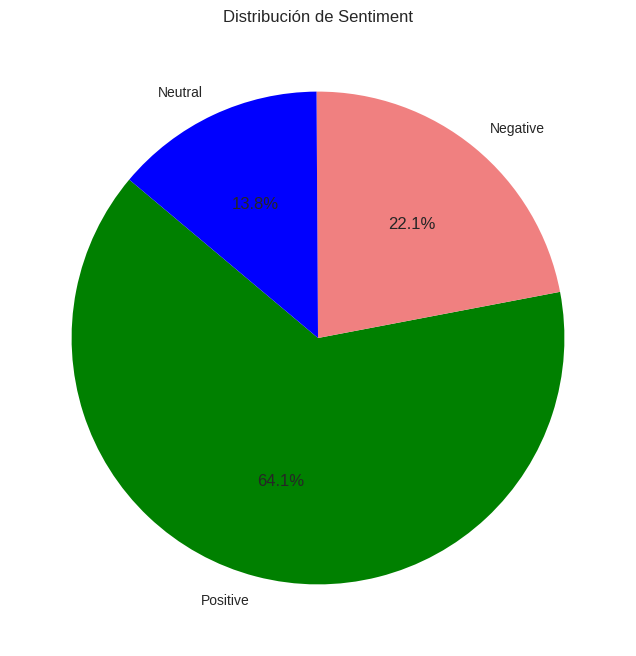

In [14]:
#de forma gráfica
sentiment_counts = df['Sentiment'].value_counts()

color_map = {
    'Positive': 'green',
    'Negative': 'lightcoral',
    'Neutral': 'blue'
}

colors = [color_map.get(cat, 'gray') for cat in sentiment_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Sentiment')
plt.show()

In [15]:
df['App'].value_counts()

,count
App,
Bowmasters,320
"CBS Sports App - Scores, News, Stats & Watch Live",320
Angry Birds Classic,320
Helix Jump,300
8 Ball Pool,300
...,...
Easy Healthy Recipes,31
Detector de Radares Gratis,31
Dresses Ideas & Fashions +3000,31


También vemos que al menos hay 30 comentarios para las aplicaciones que estamos estudiando y que la app con mayor comentarios es Angry Birds

In [16]:
#seguimos analizando un poco más todas las variables
df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [17]:
#revisamos la cantidad de valores nulos y completitud de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Vemos que existen 64295 filas únicas pero que tenemos prácticamente la mitad de información con respecto a los reviews

In [18]:
df.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [19]:
(df.isnull().sum() / len(df)) * 100

,0
App,0.000000
Translated_Review,41.788631
Sentiment,41.780854
Sentiment_Polarity,41.780854
Sentiment_Subjectivity,41.780854


por lo que vemos, a nivel porcentual el 42% de la información está faltante en nuestro dataset, veremos si es la misma información faltante en toda la fila o no

In [20]:
review_nulo = df['Translated_Review'].isnull()
df_review_nulo = df[review_nulo]
df_review_nulo

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [21]:
df_review_nulo.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


Vemos que todas estas filas no nos aportan información, por lo mismo las eliminaremos del dataset original

In [22]:
#eliminamos la informacion basura
df = df.dropna(subset=['Translated_Review'])

In [23]:
df.shape

(37427, 5)

In [24]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [25]:
df['Sentiment'].value_counts('%')

,proportion
Sentiment,
Positive,0.641195
Negative,0.220990
Neutral,0.137815


Perfecto, nuestra información basal se mantuvo, adicionalmente, tenemos estas 2 variables de sentiment polarity y sentiment subjetivity que queremos analisar un poco su relación entre ambas y la que tienen con nuestra variable objetivo Sentimiento

In [26]:
#vemos el nivel de correlación entre ambas variables
df_num=df.select_dtypes(include=['float64','int64'])
df_num.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


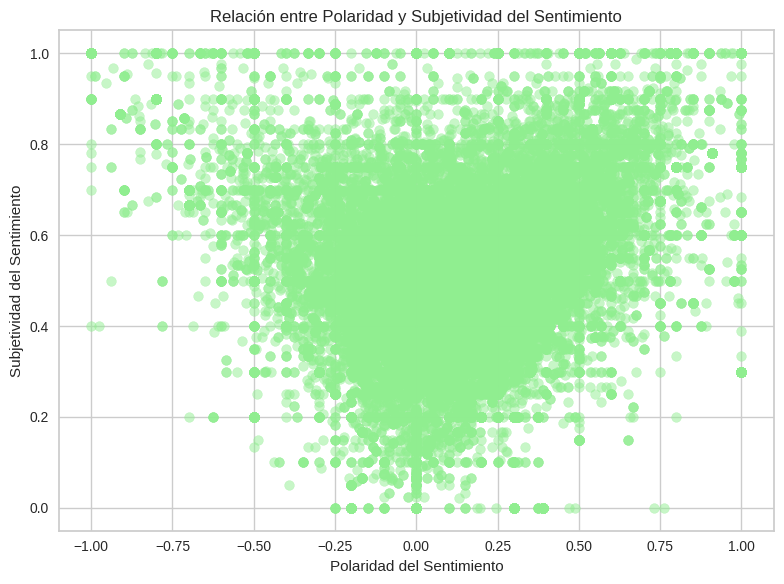

In [27]:
#gráfico entre polaridad y subjetividad
plt.figure(figsize=(8, 6))
plt.scatter(df['Sentiment_Polarity'], df['Sentiment_Subjectivity'], alpha=0.5, color='lightgreen')

plt.title('Relación entre Polaridad y Subjetividad del Sentimiento')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Subjetividad del Sentimiento')
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico nos muestra una figura interesante de pirámide invertida, vemos que la mayoría de los reviews se centran principalmente en en polaridades de -0.5 a 0.5 mientrs que la subjetividad está más concentrada entre 0.4 y 0.8.


/tmp/ipython-input-3977527305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=df, palette='Set2')


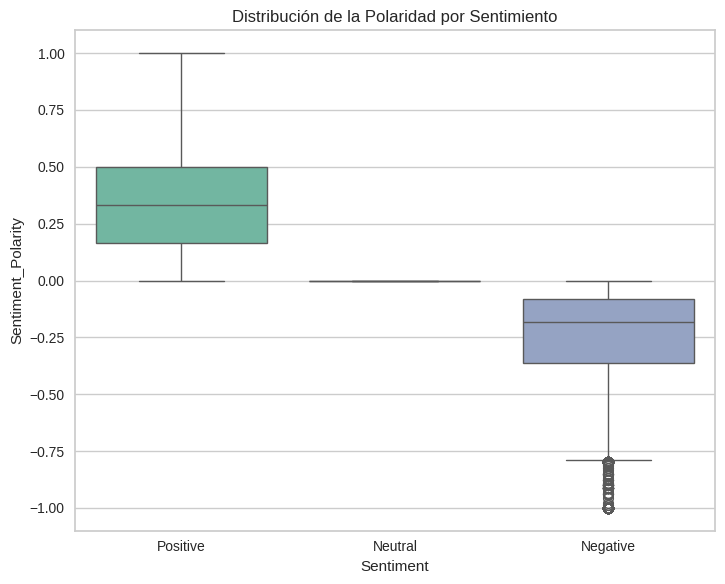

In [28]:
plt.figure(figsize=(14, 6))

#grafico con polaridad
plt.subplot(1, 2,1)
sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=df, palette='Set2')
plt.title('Distribución de la Polaridad por Sentimiento')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2589817053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Sentiment_Subjectivity', data=df, palette='Set2')


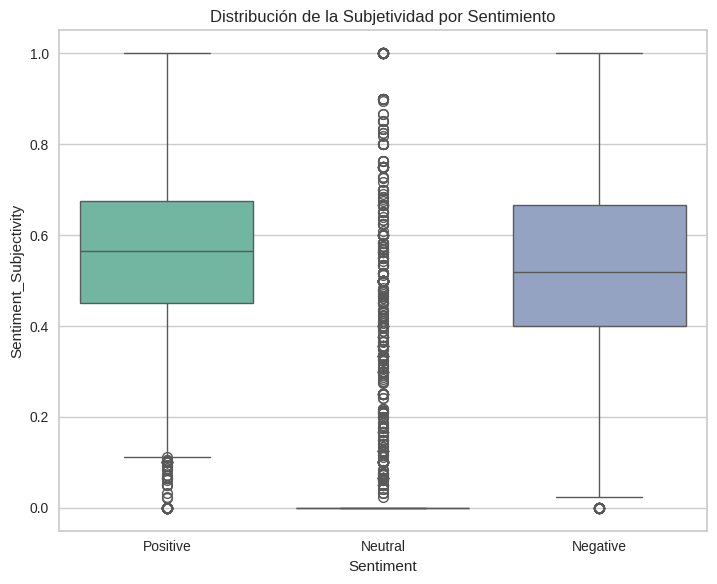

In [29]:
plt.figure(figsize=(14, 6))

#grafico con subjetividad
plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment', y='Sentiment_Subjectivity', data=df, palette='Set2')
plt.title('Distribución de la Subjetividad por Sentimiento')

plt.tight_layout()
plt.show()

Vemos gracias al gráfico que en general los sentimientos negativos, tienen una polaridad más baja, mientras los que tienen mejor polaridad a su vez tienen un sentimiento de caracter positivo, por lo que podríamos ver que existe una relación entre estas variables.
En el caso de la subjetividad, vemos que en general las reseñas más positivas y negativas tienen un nivel de subjetividad más moderado, en torno al 0.5 que podría estar asociado a que las respuestas van más asociadas a experiencia personales entorno a la app, sin embargo, vemos que en los casos de sentimiento neutro, son en su mayoría objetivas (más tirado a 0)

#Preprocesamiento de datos

Ahora bien, para poder crear nuestro modelo, debemos realizar un par de arreglos en nuestro dataset, de forma que todo esté estandarizado, a este paso lo llamamos el preprocesamiento de nuestra información

In [30]:
#creamos un df de respaldo en caso de necesitarlo
df_original=df.copy()
df_original.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [31]:
#convertir todo a minúscula en nuestro dataframe a trabajar
df.loc[:, 'App'] = df['App'].str.lower()
df.loc[:, 'Translated_Review'] = df['Translated_Review'].str.lower()

In [32]:
#quitamos los valores numericos que no son relevantes
df.loc[:, 'App'] = df['App'].str.replace(r'\d+', '', regex=True)
df.loc[:, 'Translated_Review'] = df['Translated_Review'].str.replace(r'\d+', '', regex=True)

In [33]:
#removemos los signos de puntuación
df.loc[:, 'App'] = df['App'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df.loc[:, 'Translated_Review']  = df['Translated_Review'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [34]:
#eliminamos los espacios en blanco de ambas columnas
df.loc[:, 'App'] = df['App'].str.replace(r'\s+', ' ', regex=True).str.strip()
df.loc[:, 'Translated_Review'] = df['Translated_Review'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [35]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,best foods for you,i like eat delicious food thats im cooking foo...,Positive,1.00,0.533333
1,best foods for you,this help eating healthy exercise regular basis,Positive,0.25,0.288462
3,best foods for you,works great especially going grocery store,Positive,0.40,0.875000
4,best foods for you,best idea us,Positive,1.00,0.300000
5,best foods for you,best way,Positive,1.00,0.300000


Bien, pasamos a tener nuestro dataset pseudo limpio, ahora tokenizaremos y eliminaremos las palabras de parada o palabras básicamente inútiles que no nos aportan en nada

In [36]:
nltk.download('stopwords')
#stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
# funcion de tokenizacion y eliminacion de stopwords
def tokenizar_y_eliminar_stopwords(text):
    tokens = text.split()
    tokens_filtrados = [w for w in tokens if w.lower() not in stop_words]
    return ' '.join(tokens_filtrados)

In [38]:
# llamamos a la funcion y se la aplicamos a app y translated_reviews
df.loc[:, 'App'] = df['App'].apply(tokenizar_y_eliminar_stopwords)
df.loc[:, 'Translated_Review'] = df['Translated_Review'].apply(tokenizar_y_eliminar_stopwords)

In [39]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,best foods,like eat delicious food thats im cooking food ...,Positive,1.00,0.533333
1,best foods,help eating healthy exercise regular basis,Positive,0.25,0.288462
3,best foods,works great especially going grocery store,Positive,0.40,0.875000
4,best foods,best idea us,Positive,1.00,0.300000
5,best foods,best way,Positive,1.00,0.300000


Buenísimo, hemos terminado el preprocesamiento, estandarizamos las palabras y eliminamos las palabras basura para nuestro modelo

In [40]:
df_negativo=df[df['Sentiment']=='Negative']
df_neutro=df[df['Sentiment']=='Neutral']
df_positivo=df[df['Sentiment']=='Positive']

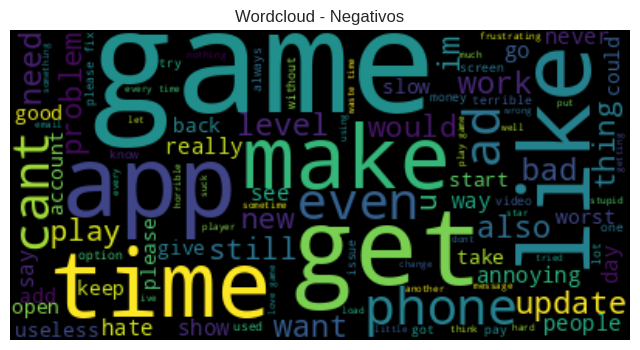

In [41]:
#vemos cuáles son las principales palabras para las variables a nivel de sentimiento negativo
stop_words.update(["br", "href"])
text_negativo = " ".join(df_negativo['Translated_Review'])
wordcloud_negativo = WordCloud(stopwords=stop_words).generate(text_negativo)
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud - Negativos')
plt.show()

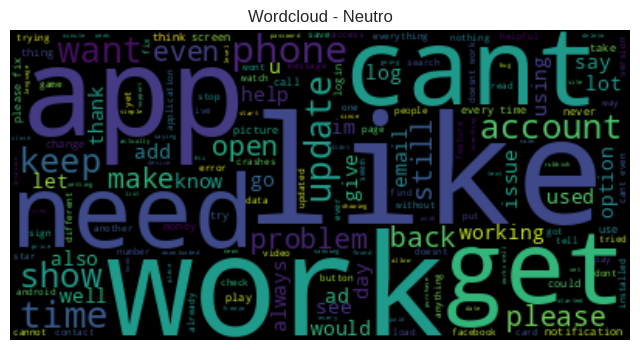

In [42]:
#vemos cuáles son las principales palabras para las variables a nivel de sentimiento neutro
stop_words.update(["br", "href"])
text_neutro = " ".join(df_neutro['Translated_Review'])
wordcloud_neutro = WordCloud(stopwords=stop_words).generate(text_neutro)
plt.imshow(wordcloud_neutro, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud - Neutro')
plt.show()

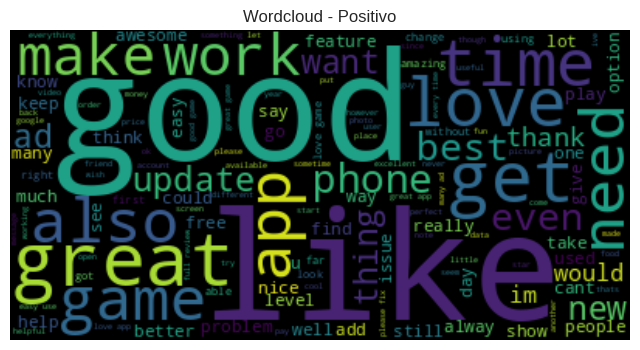

In [43]:
#vemos cuáles son las principales palabras para las variables a nivel de sentimiento positivo
stop_words.update(["br", "href"])
text_positivo = " ".join(df_positivo['Translated_Review'])
wordcloud_positivo = WordCloud(stopwords=stop_words).generate(text_positivo)
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud - Positivo')
plt.show()

Vemos que en el caso positivo, existen palabras de valoración como goo, love, gratea, need, que indican un claro nivel de contento y agrado en sus sentiminetos, en el caso de palabras negativas, hay algunas que destacan como bad, can't, time even, update donde puede indica el descontento por nuevas versiones o necesidad de hacer un refresco en la aplicación. Finalmente, por el lado de las palabras neutras, vemos el caso que destacan palabras como like pero al mismo tiempo can't lo que indica que son más como el miz entre ambos sentimientos.

#Creación del modelo de ML

Ahora, pasaremos a vectorizar nuestro texto, esto porque necesitamos vectorizarlo para poder crear nuestro modelo de ML, para esto, utilizaremos el vector TfidfVectorizer, más que nada porque este ayuda a tener el peso relativo de la palabra por sobre solo el clásico recuento, entonces quita de relevancia palabras comunes como los conectores y resaltando las que son más específicas en si para el contexto q estamos trabajando.

In [44]:
#vectorizador
vectorizador = TfidfVectorizer()

In [45]:
x = vectorizador.fit_transform(df['Translated_Review'])
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 409520 stored elements and shape (29941, 23050)>

In [47]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 102299 stored elements and shape (7486, 23050)>

In [48]:
#utilizamos nuestro modelo de LogisticRegression por tener en general un muy buen performance con muy pocos recursos
model = LogisticRegression(max_iter=1000)

In [49]:
#entrenamos el modelo
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
#predecimos el modelo a ver q tal
y_pred = model.predict(x_test)

In [51]:
#vemos la precisión del modelo que construirmos
precision = accuracy_score(y_test, y_pred)
precision

0.9125033395671921

In [52]:
#calculamos desviación estandar
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(f'Desviacion estándar: {np.std(scores):.3f}')

Desviacion estándar: 0.005


Excelentes resultados, nuestor modelo predice con un 91% de certeza los valores de sentimientos y nuestra varianza en bastante baja (0,005). Para comprobar en más detalle, crearemos nuestra matriz de confusión para ver nuestras predicciones

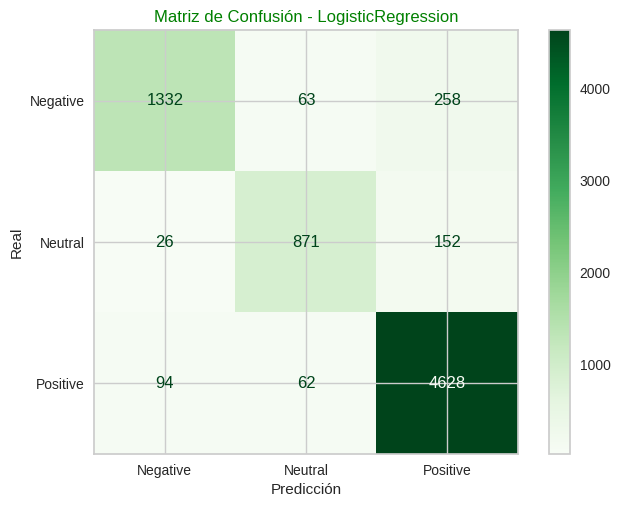

In [53]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusión - LogisticRegression', color='Green')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

En general vemos que el modelo tiene un muy buen desempeño identificando las reseñas positivas, con muy buen nivel de performance y precisión, ahora, donde vemos que tiene una oportunidad de mejora es que en general se tiende a confundir para predecir las que son negativas y neutras, esto puede ser por palabras más comunes entre ambos sentimientos que dificultan el entendimiento para le modelo, no obstante, hay formas en las que podemos seguir mejorando y optimizando el modelo

#Ajuste de Hiperparámetros

vimos que nuestro modelo tiene una sólida precisión, sin embargo, todavía tiene espacio apra mejora, por lo mismo, es que haremos el proceso de ensamble y ajuste de hiperparámetros para poder mejorar aun más la performance

In [54]:
#seleccionamos ahora nuestroa parámetros para la búsqueda de la rejilla
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

In [55]:
#creamos un objeto de búsqueda en rejilla utilizando el pipeline y los hiperparámetros
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

In [56]:
#entrenamos la búsqueda en rejilla para el conjunto de entrenamiento
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [57]:
#imprimimos los mejores hiperparámetros encontrados
print("mejores parámetros:", grid.best_params_)

mejores parámetros: {'C': 10, 'solver': 'liblinear'}


In [58]:
#mejor modelo ajustando los hiperparámetros
mejor_modelo = grid.best_estimator_

In [59]:
#predecimos nuestros valores
y_pred_tuned = mejor_modelo.predict(x_test)

In [60]:
#calculamos el nivel de precision
precision_hiperparametros = accuracy_score(y_test, y_pred_tuned)
precision_hiperparametros

0.9281325140261822

In [61]:
#calculamos la desviación estantar del nuevo modelo
scores_tuned = cross_val_score(mejor_modelo, x, y, cv=5, scoring='accuracy')
print(f'Desviacion estándar: {np.std(scores_tuned):.3f}')

Desviacion estándar: 0.003


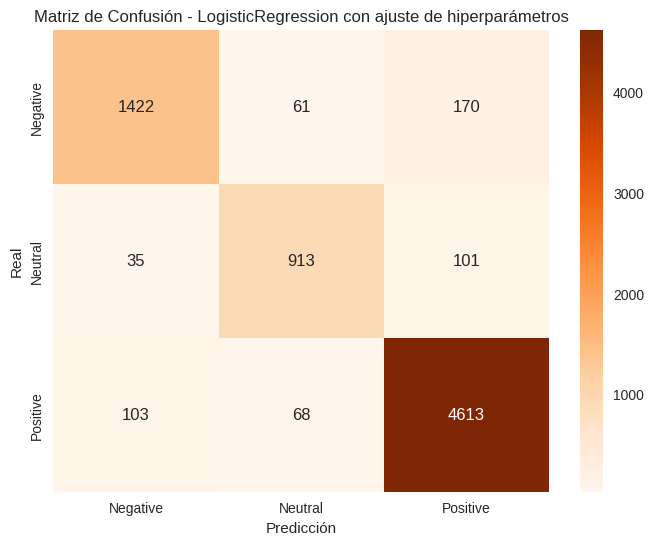

In [62]:
#creamos nuevamente nuestra maatriz de confusión para ver los resultados
cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=mejor_modelo.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Oranges', xticklabels=mejor_modelo.classes_, yticklabels=mejor_modelo.classes_)
plt.title('Matriz de Confusión - LogisticRegression con ajuste de hiperparámetros')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Perfecto, vemos que la nueva matrixz de confusión nos indica que la cantidad de falsos negativo disminuye en 88, lo cuál es buenísimo y nos dice que el modelo con ajuste en los hiperparámetros detecta muchísimo mejor las instancias positivas.
Adicionalmente, vemos una leve aumento en el caso de los verdaderos positivos. Adicionalmente, vemos que la precisión del modelo aumentó en aprox un 1% y la desviación estandar disminuyo.

#Ensamble

In [63]:
#usaremos Bagging
modelo_b= BaggingClassifier(
    estimator=grid.best_estimator_,
    n_estimators=10,
    random_state=42).fit(x_train, y_train)

In [64]:
#realizamos la prediccion
y_pred_bagging = modelo_b.predict(x_test)

In [65]:
#calculamos el nivel de precision
precision_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging

0.9231899545818862

In [66]:
#calculamos los scores y vemos la desviación estandar
scores = cross_val_score(modelo_b, x, y, cv=5, scoring='accuracy')
print(f'Desviacion estándar: {np.std(scores):.3f}')

Desviacion estándar: 0.003


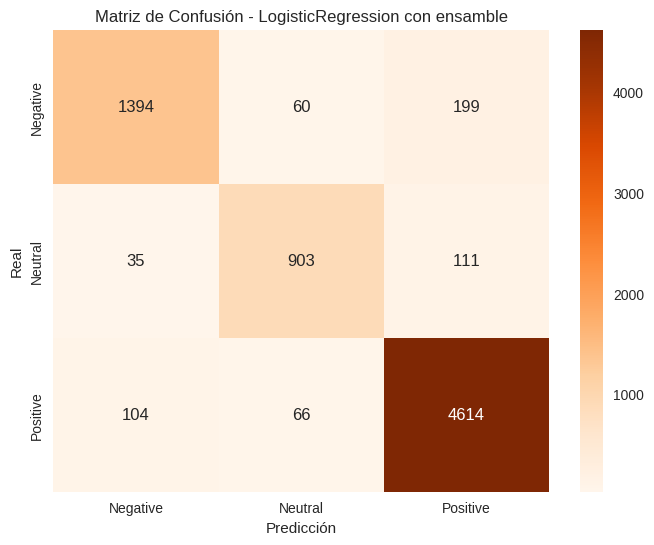

In [67]:
#creamos nuevamente la matriz de confusión
cm_bagging = confusion_matrix(y_test, y_pred_bagging, labels=mejor_modelo.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Oranges', xticklabels=mejor_modelo.classes_, yticklabels=mejor_modelo.classes_)
plt.title('Matriz de Confusión - LogisticRegression con ensamble')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Vemos que nuestra modelo con Bagging ha mejorado también la precisión general vs el modelo básico de regresión logística y se mantiene más menos estable respecto a la mejora con los ajustes de hiperparámetros.

Momento de ponernos a prueba, seleccionaremos 3 comentarios reales traidos de algunas apps acuales de google play y pondremos a prueba el modelo

In [88]:
review_prueba_positivo = "The game is really good; it even has a variety of games you can play. Like Brookhaven, Adopt Me, Murder Mystery 2, and more fun games all in one. What I would like them to change is the avatar editor. Honestly, I have no problem with 'Robux' as they call it. I would just love it to be free and not require 'Robux'. That's all. Goodbye!"

In [98]:
review_prueba_negativo = "I don't want to speak badly about the app, but honestly, only more negative things have happened in this month and a few days since I installed it. I don't understand, they delete emotes and clothes so quickly. There’s really no record of the purchase, and there's no option in the help section to request a Robux refund. Don't you think they should at least refund what we spent? It's unfair; I've spent a considerable amount so far. Seriously, deleting things as if we got them for free is unfair."

In [91]:
review_prueba_neutro = "A lot of ads."

In [99]:
#creamos una función para preprocesar el texto que venga
def preprocesar_texto(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # tokenizamos y eliminamos las stopwords
    tokens = text.split()
    tokens_filtrados = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens_filtrados)

In [100]:
#texto preprocesado positivo
texto_procesado_p = preprocesar_texto(review_prueba_positivo)
#texto preprocesado negativo
texto_procesado_neg = preprocesar_texto(review_prueba_negativo)
#texto preprocesado neutro
texto_procesado_neu = preprocesar_texto(review_prueba_neutro)

In [101]:
#vectorizamos los textos
vector_prueba_p = vectorizador.transform([texto_procesado_p])
vector_prueba_neg = vectorizador.transform([texto_procesado_neg])
vector_prueba_neu = vectorizador.transform([texto_procesado_neu])

In [102]:
#predicción positiva
prediccion_p = model.predict(vector_prueba_p)
prediccion_p

array(['Positive'], dtype=object)

In [103]:
#prediccion negativa
prediccion_neg = model.predict(vector_prueba_neg)
prediccion_neg

array(['Negative'], dtype=object)

In [104]:
#Prediccion neutra
prediccion_neu = model.predict(vector_prueba_neu)
prediccion_neu

array(['Neutral'], dtype=object)

#APIREST

In [ ]:
#importamos lo necesario
from flask import Flask, request, jsonify
import joblib

In [ ]:
#guardamos las variables de nuestro modelo y vector ya usadas
modelo_final=joblib.dump(modelo_b, 'modelo_b.pkl')
vectorizador_final=joblib.dump(vectorizador, 'vectorizador_tfidf.pkl')

In [ ]:
#creamos una función para preprocesar el texto que venga
def preprocesar_texto(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # tokenizamos y eliminamos las stopwords
    tokens = text.split()
    tokens_filtrados = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens_filtrados)

In [ ]:
#app = Flask(__name__)

#@app.route('/predict', methods=['POST'])
#def predecir():
#    try:
#      datos = request.get_json()

#      if not datos:
#        return jsonify({'error': 'No se proporcionaron datos en la solicitud.'}), 400

#      texto = datos.get('TextoLimpio', '')
#      texto_procesado = preprocesar_texto(texto)
#      z = vectorizador.transform([texto_procesado])
#      prediccion = modelo.predict(z)[0]
#      sentimiento = (
#             'Positivo' if prediccion == 1 else
#             'Negativo' if prediccion == 0 else
#             'Neutro' if prediccion == 0.5 else
#             'Desconocido')

#      return jsonify({'Prediccion': prediccion[0],
#                      'Sentimiento': sentimiento})

#    except Exception as e:
#        return jsonify({'error': str(e)}), 500



#if __name__ == '__main__':
#    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


#Presentación

¿Eres de las personas que lee comentarios o reviews antes de comprar algo? Yo soy una de esas personas, por lo que cuando hay algún producto que tnego la intención de comprar, soy de las personas que revisan por internet los comentarios y veo videos para tener el review del producto, si todo sale bien y los comentarios me convencen, compro el producto.

Este pequeño ejemplo, de un análisis que hago yo, caso a caso, leyendo comentario por comentario, es algo común, especialmente para empresas de tecnología, ecommerce, retailers, entre otros.

Uno de los casos, y nuestro problema a tratar conlleva el poder entender todos los comentarios que realizan los usuarios en la store de google play y poder clasificar si el comentario para tal aplicación termina siendo positivo, negativo o en su defecto neutro, para ponerlo a modo de ejemplo sensillo, nuestro problema busca poder interpretar los reviews de los usuarios y decir si el comentario termina siendo bueno, neutro o malo para la aplicación.
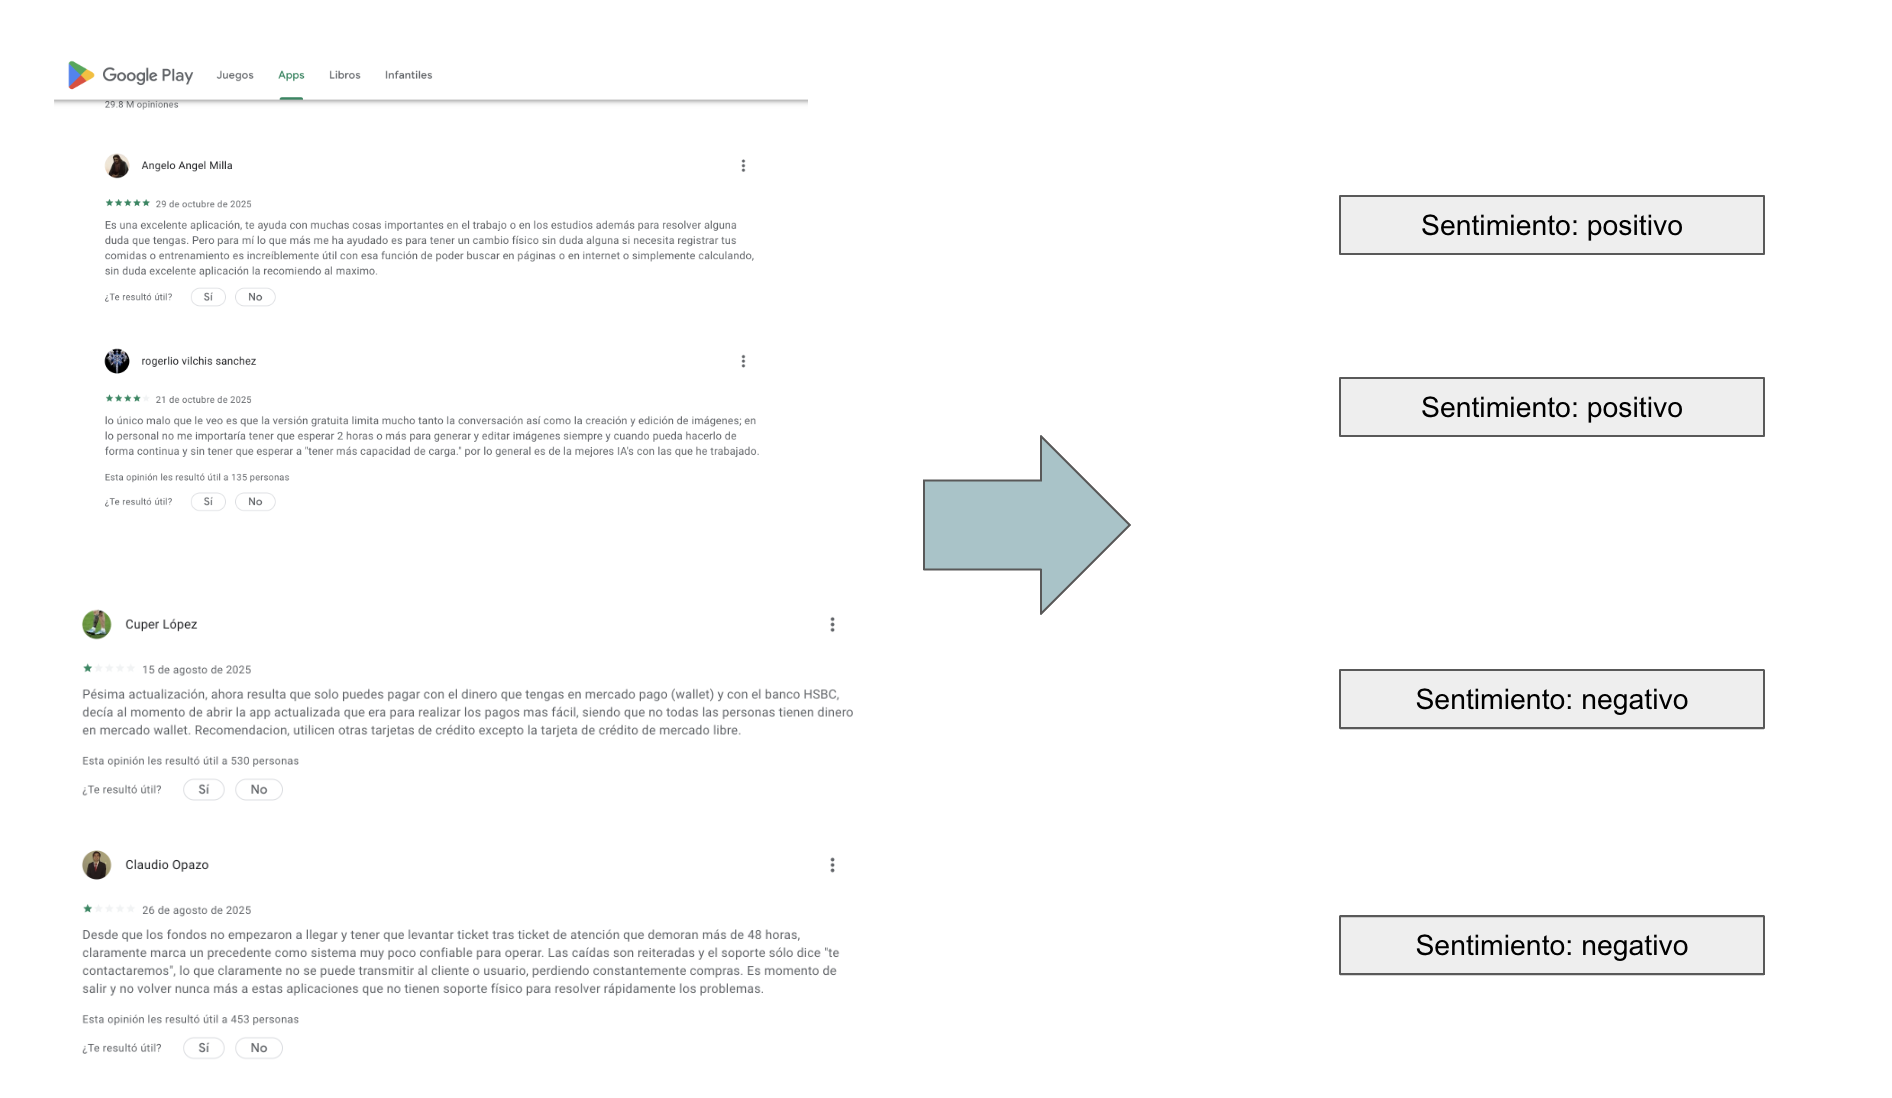

**¿Qué información tenemos disponible?**

Para poder desarrollar nuestro modelo, contamos con la información del dataset: googleplaystore_user_reviews. Este dataset consta de 5 variables principales:
1. App: nombre de la aplicación
2. Translated_review: comentario del usuario respecto a la aplicación
3. Sentiment: clasificación del sentimiento que existe respecto al comentario
4. Sentiment_Polarity: que corresponde al nivel de polaridad del comentario, de -1 a 1.
5. Sentiment_Subjetivity: puntuación para los sentimientos, emociones, creencias, desahogos, etc., de los usuarios.


Tenemos información de aproximadamente 65.000 datos

**¿Qué hacemos para poder crear nuestro modelo?**


El primer paso siempre consiste en hacer un análisis exploratorio de la información que tenemos, esto nos ayuda a entender con mayor profundidad la información que tenemos, ciertas tendencias o anomalías que existan en el conjunto de datos

Esto es una pequeña pincelada de cómo se ve nuestro dataset.
Notamos inmediatamente que existen un par de valores Nulos, adicionalmente, que, como cualquier persona común y corriente, los reviews no persiguen una lógica tan estructurada como uno quisiera, vemos que hay mayúsculas, apóstrofes, algunos utilizan puntuación, algunos no, etc.
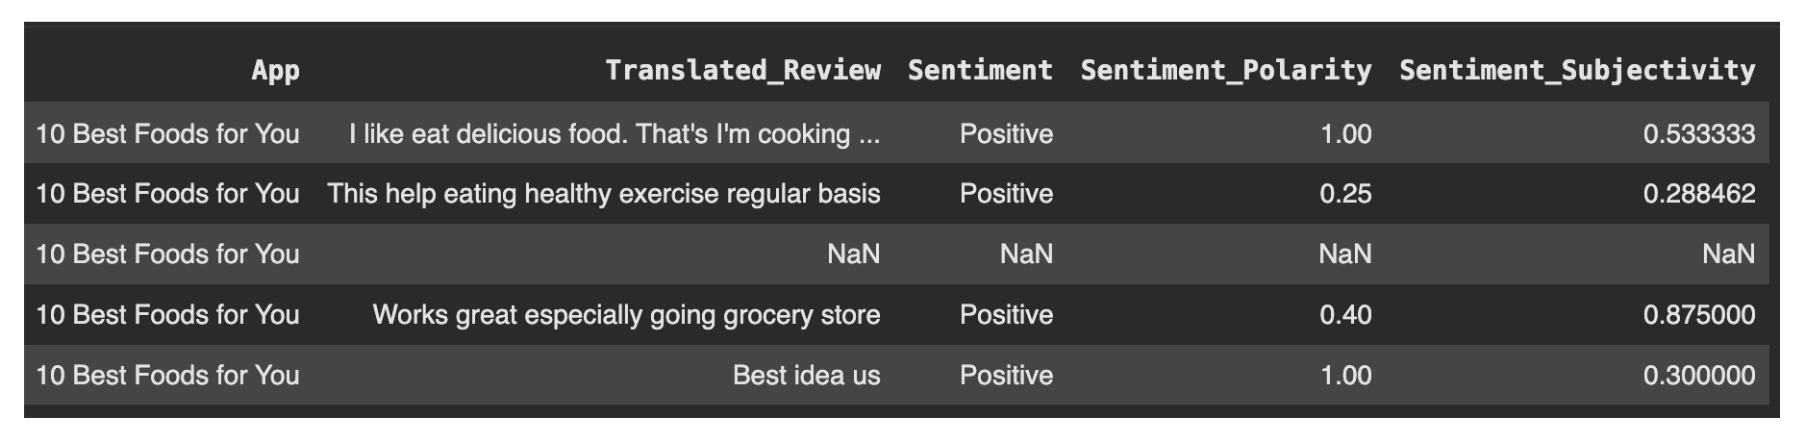

Pues manos a la obra, lo primero que queremos ver es la distribución de nuestra variable objetivo o también llamada variable que tenemos interés por poder "proyectar" nuestra famosa variable independiente, en este caso: Sentiment, para eso, vemos un poco la distribución de nuestra variable

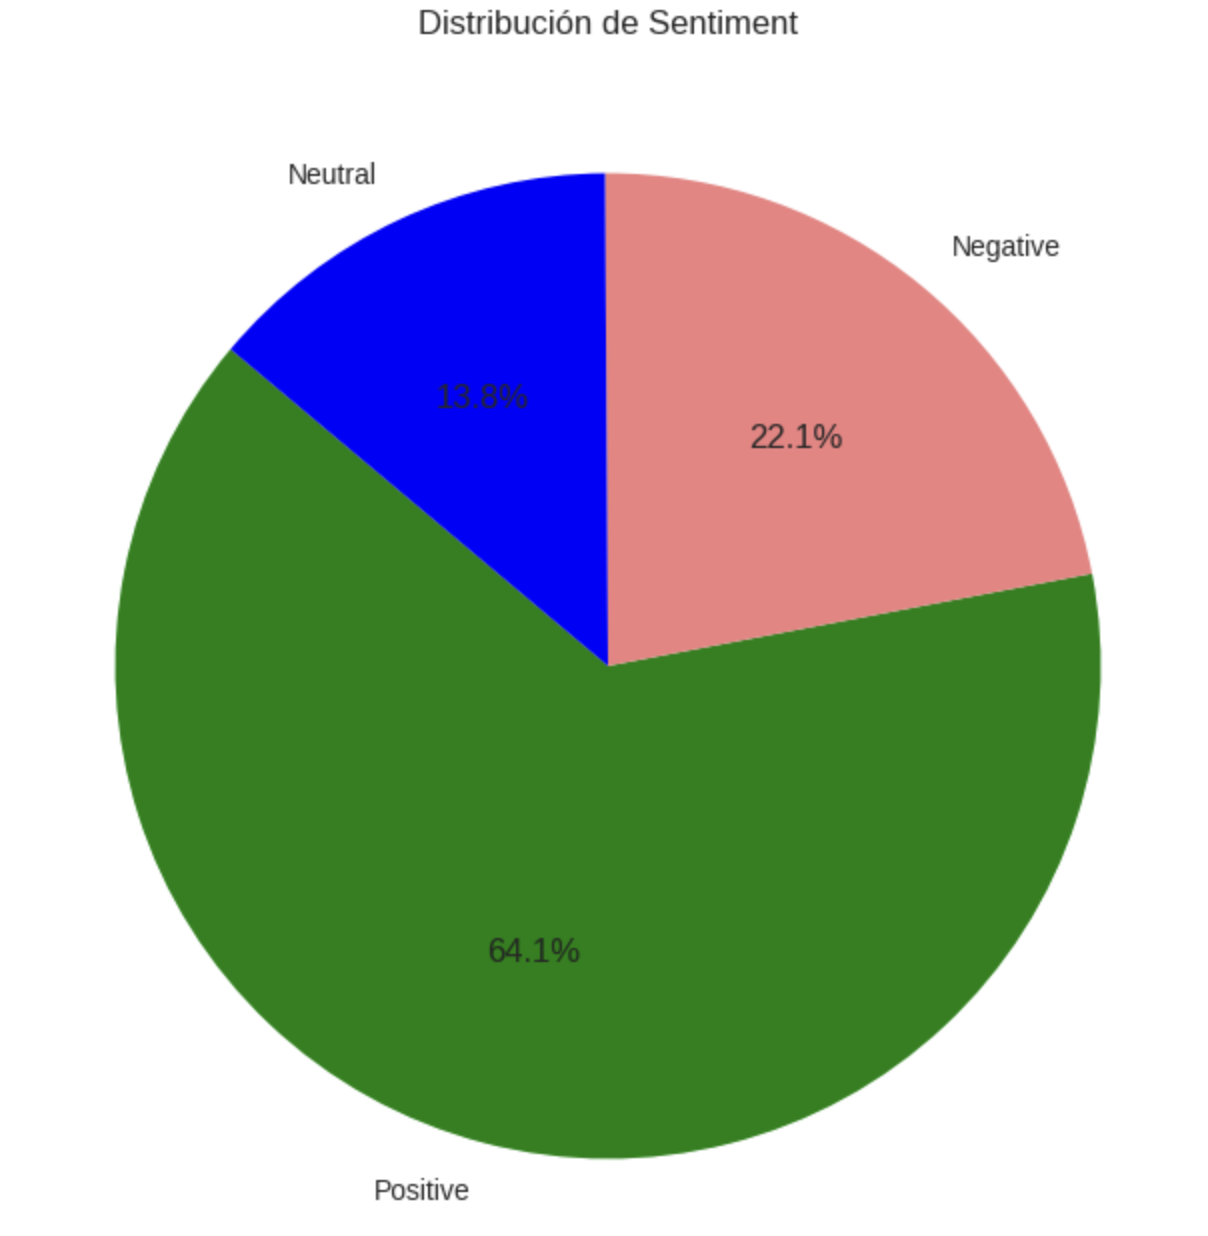

Ahora bien, algo que necesitamos hacer es poder entender cuánta información realmente disponemos. como vimos en nuestro pequeño vistazo, encontramos que hay un par de campos que están vacíos, debemos ver qué información y cuánta es la que tenemos "perdida" y accionar con ella porque para poder crear un modelo no podemos tener campos nulos.

Para eso, fuimos a ver qué tantos valores estaban vacíos, y valla sorpresa!

 Column                  Non-Null Count  
------                  --------------  
 App                     64295 non-null  
 Translated_Review       37427 non-null  
 Sentiment               37432 non-null  
 Sentiment_Polarity      37432 non-null  
 Sentiment_Subjectivity  37432 non-null  


 Prácticamente 1/3 de las filas contenían valores nulos, dado esto y que no eran nulos en columnas repartidas sino que toda la fila no tenía información, decidimos eliminar 1/3 de los datos y concentraron en el 2/3 valioso de información.

Ahora, como mencionamos, hay 5 variables en este dataset, sin embargo, particularmente 2 serán de nuestro interés principal, estas serán Translated_Review y Sentiment. ¿Por qué? debido a que las variables de Sentiment_Polarity y Sentiment_Subjectivity son variables de output o salida, es en base al comentario propiamente tal que se generan los valores para las otras 3 columnas. Como nuestro principal objetivo está en poder entender el sentimiento, es que nos enfocaremos por ende en esa variable (output) y nuestro input será la información proveniente de los comentarios.

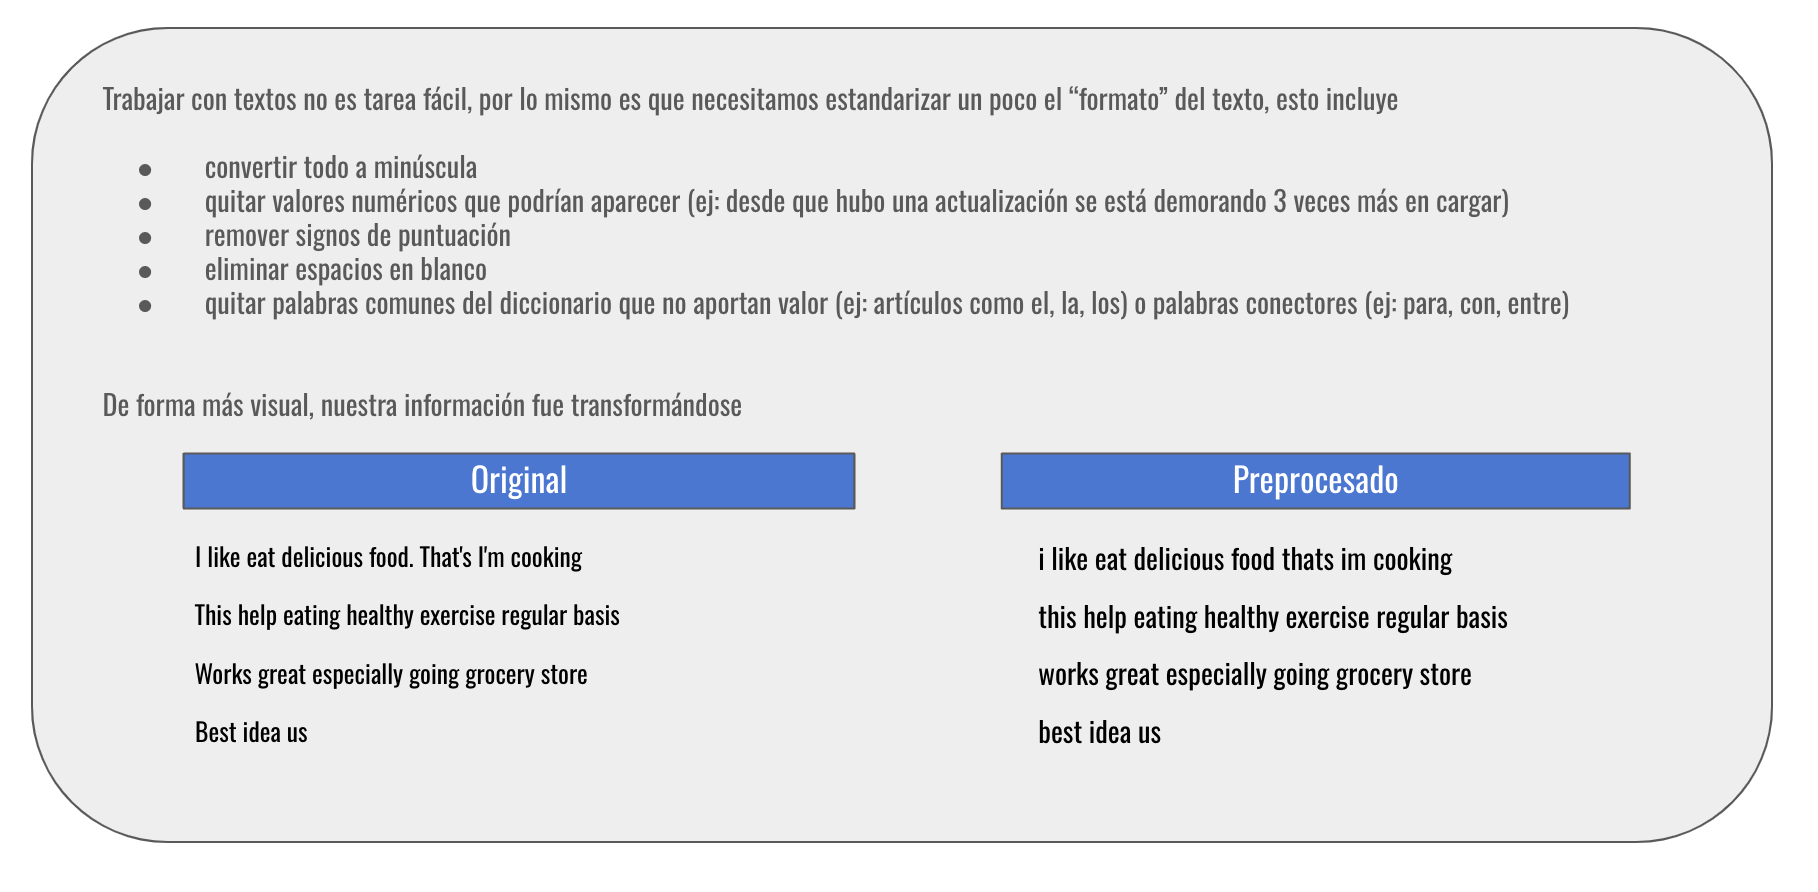

¿Y qué queda ahora?
Pues una vez que el texto está listo para ser usado, necesitamos crear nuestor modelo, para ello utilizamos la siguiente lógica:

Restricciones:
- Capacidad computacional

Dataset:
- Pequeño, 37500 filas aproximadamente con 5 columnas, de las cuales 2 son las realmente importantes.

Modelo a elegir:
- Regresión logísitica: Se selecciona este modelo por la simplicidad de los datos, en ocasiones anteriores este modelo ha logrado generar muy buenas predicciones, en un modelo rápido, de bajo costo computacional y que logra un nivel de precisión muy alto. si bien existen muchos modelos más complejos que lograrían tener un mucho mejor nivel de precisión, requieren a su vez una capacidad computacional mayor y tienden en algunos casos a sobreajustarse.


Vectorizador:
- TfidfVectorizer: debido a que da el peso relativo a la palabra en función de su aparición, además, logra reducir el peso de palabras más comunes que están presentes en la mayoría de los textos.

Pues manos a la obra, seguimos el siguiente flujo para poder realizar nuestro modelo

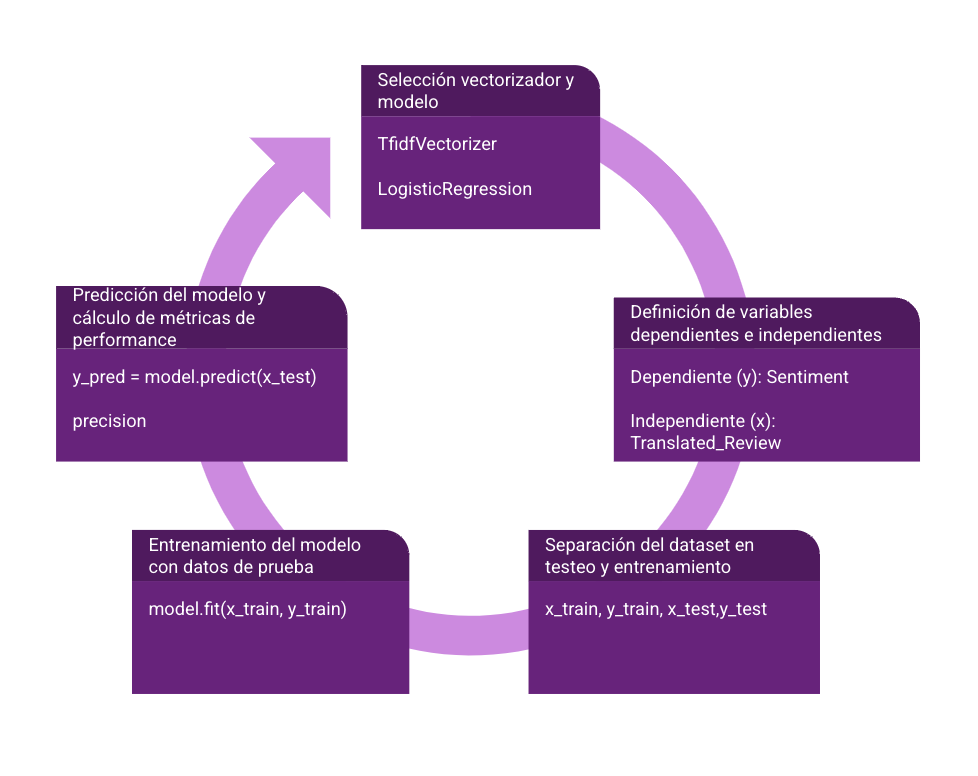

Finalmente obtenemos que nuestor modelo una vez realizado el proceso, tiene la capacidad o performance de predicción del 91% de los datos, esto indica un muy buen nivel de resultado, ahora bien, tiene oportunidad de mejora y para ello realizamos el ajuste de hiperparámetros, esto lo hacemos principalmente porque le permite a nuestro modelo trabajar de forma mucho más efectiva, encontrando valores en sus parámetros que permitan maximizar el rendimiento. Adicionalmente, realizamos el ensamble, pues logra mejorar la estabilidad y precisión, reduciendo la varianza.


Y nuestro modelo, avanza de la siguiente forma sus predicciones:


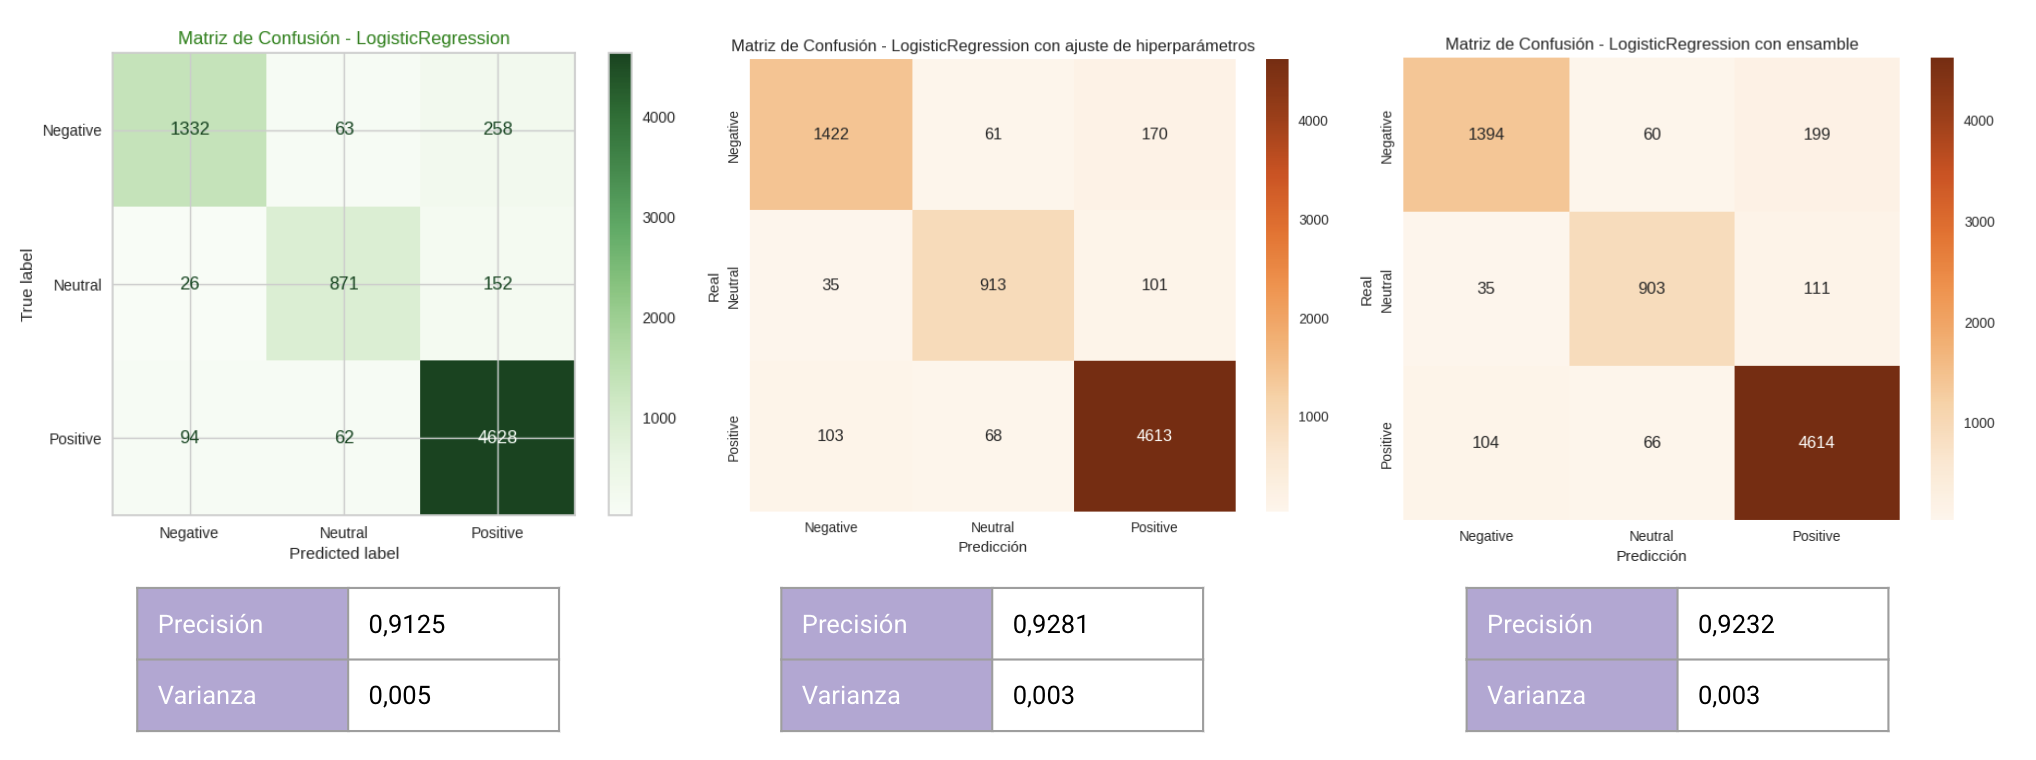

Las matrices de confusión muestran que, al ajustar los parámetros y usar un ensamble, el modelo mejora en identificar correctamente las clases. Tiene menos errores y acierta más en clasificar si un review es positivo, negativo o neutro. También se vuelve más estable y confiable en sus predicciones, logrando mejores resultados en general. Esto también se condice con sus métricas de precisión y varianza.

Pues bien, sabemos que el modelo en el papel funciona, pero lo interesante es verlo insitu, por lo mismo es que tomamos un par de ejemplos de la realidad y veremos si nuestro modelo es capaz de predecir correctamente el sentimiento, para eso fuimos a buscar comentarios en appsotre de gente en la actualidad y pusimos a prueba nuestro modelo para ver su nivel de predicción de sentimiento

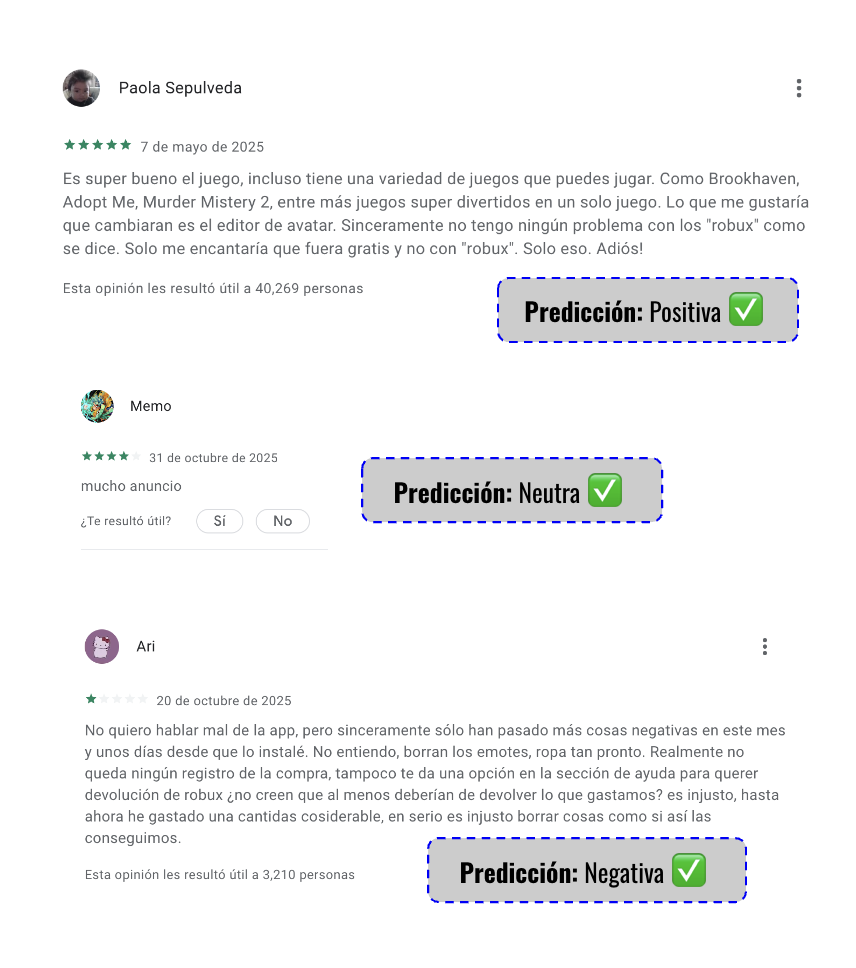

Los mayores aprendizajes que podemos sacar respecto al modelo y en general respecto a los modelos de machile learning es que bien utilizados, resultan muy útiles para tareas repetitivas o para acciones que son "simples" para el ser humano, en algunos casos como este la interpretación si se vuelve un poco más compleja y existen matices con los que trabajar. Personalmente para este tipo de ejercicios de análisis de sensibilidad se puede ser que en general el core del mensaje se entiende y se logra categorizar de la manera correcta, sin embargo, existen algunos más ambiguios y es ahí donde entra el factor humano, pues nosotros los humanos si bien tenemos la habilidad de pensar y expresarnos, en algunos casos la escritura de esos pensamientos no es tan clara, lo que efectivamente complejiza la interpretación de las máquinas.

Otro de los más grandes aprendizajes es la elección de modelos simples por sobre complejos, en general en el transcurso de las semanas en clase, ya nos damos cuenta que este tipo de modelos si bien con un leve menor nivel de precisión funcionan muy bien para este tipo de ejercicios, ahora bien, existen otros donde vale la pena todo el nivel de recursos para mejorar aunque sea un 0,1% de precisión, ejemplos en el caso de vida o muerte para un paciente requieren de modelos más exaustivos y precisos, por lo que se justifica de sobremanera todo el tiempo y capacidad computacional que requieren estos modelos.